## Solving the Schrodinger Equation using the Finite Difference Method

Recall that to find the quantum mechanical solution to a system we need to solve the operator equation:
$$
H = (-\frac{\hbar^2}{2m}\nabla^2  + V)
$$

from which we can identify the **Hamiltonian** operator, $H$, so called because of its similarity to to Hamiltonian form of classical mechanics.

In this notebook we solve equation for the double harmonic well numerically using the Finite Difference Method.

Heavily inspired by this blog post: https://medium.com/modern-physics/finite-difference-solution-of-the-schrodinger-equation-c49039d161a8

And this one: http://albi3ro.github.io/M4/Time-Evolution.html

In [1]:
using Plots, LinearAlgebra
default(lw=2, legend=:none)

The domain is over the interval $[a,b]$ and discretised with $N$ grid points.

Calculate the potential energy, $V$, over the domain.

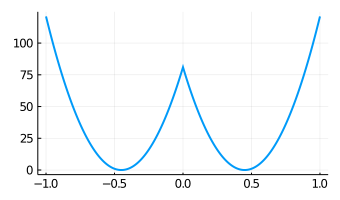

In [2]:
N = 1001
a = -1
b = 1

Δx = (b-a)/(N-1)
x = a:Δx:b

V = 400*(abs.(x).-0.9/2).^2

plot(x, V, size=(340, 200))

Then calculate discretised version of the kinetic energy operator, $\nabla$, over the domain using a centered differential operator, $T$.

In [3]:
T = zeros(N,N)
for i in 1:N
    T[i,i] = -2
    if i>1 T[i,i-1] = 1 end
    if i<N T[i,i+1] = 1 end
end
T ./= Δx^2;

Finally define the Hamiltonian operator, $H$, as the sum of the kinetic and potential components and obtain its eigen solution numerically. Note that we assume $\hbar=1$ and $m=1$ for simplicity.

In [4]:
H = -T/2 + Diagonal(V)

E,ψ = eigen(H)
E ./= E[1]
E[1:4]

4-element Array{Float64,1}:
 1.0
 1.018020485901857
 2.9360456425421484
 3.109674897006595

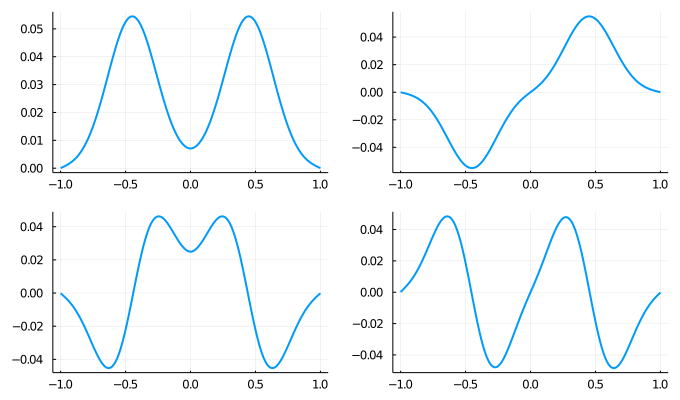

In [5]:
plot(x, ψ[:,1:4], layout=4, size=(680, 400))

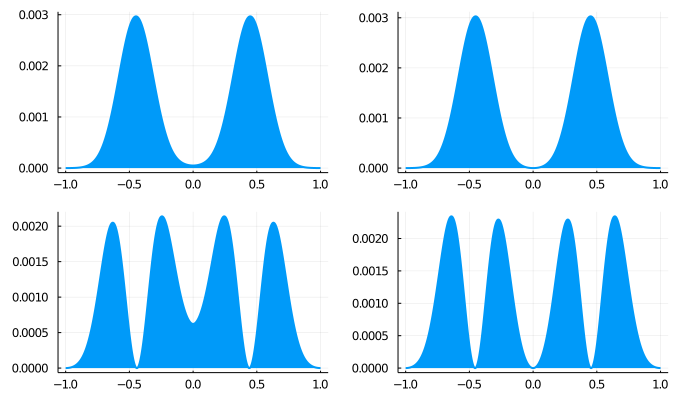

In [6]:
plot(x, ψ[:,1:4].^2, layout=4, fill=true, size=(680, 400))

### Using the DiffEqOperators package to generate the Lapacian

This package provides a convenient way to find the discretised centered differential operator. It should give exactly the same result.

In [7]:
using DiffEqOperators
T = convert(Array, DerivativeOperator{Float64}(2,2,Δx,N,:Dirichlet0,:Dirichlet0));

In [8]:
H = -T/2 + Diagonal(V)

E,ψ = eigen(H)
E ./= E[1]
E[1:4]

4-element Array{Float64,1}:
 1.0
 1.018020485901857
 2.9360456425421484
 3.109674897006595